a)

/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/radbrad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

Testing hidden layer count
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Testing hidden layer node count
Testing learning
Testing max epoch


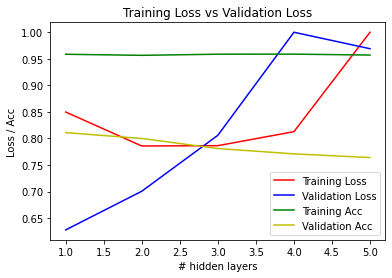

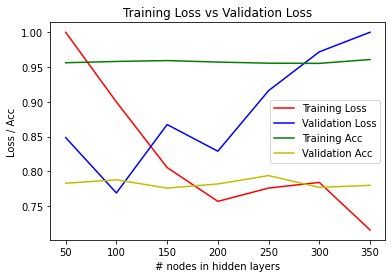

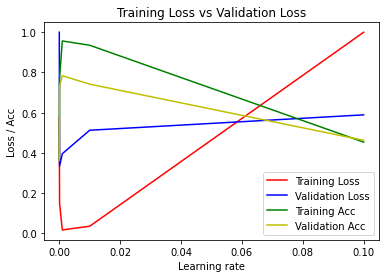

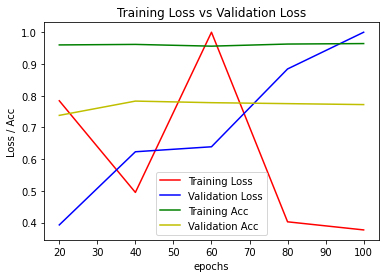

In [1]:
'''
    Multi-class classifier w/ neural nets
'''
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#may not need
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def graphData(X, y, xlabel):

    max_loss = max([item[0] for item in y])
    max_loss_val = max([item[1] for item in y])

    plt.clf()
    plt.plot(X, [item[0] / max_loss for item in y], 'r', label='Training Loss')
    plt.plot(X, [item[1] / max_loss_val for item in y], 'b', label='Validation Loss')
    plt.plot(X, [item[2] for item in y], 'g', label='Training Acc')
    plt.plot(X, [item[3] for item in y], 'y', label='Validation Acc')
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel(xlabel)
    plt.ylabel('Loss / Acc')
    plt.legend()
    plt.show()  

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

def trainModel(X_train, y_train, X_val, y_val, hidden_layers = 3, hidden_nodes = 200, learning_rate = 0.001, epochs = 20):

    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(10000,)))

    for i in range(hidden_layers):
        model.add(Dense(hidden_nodes, activation='relu'))

    model.add(Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    K.set_value(model.optimizer.learning_rate, learning_rate)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=512, validation_data=(X_val, y_val), verbose = 0)

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    return loss[-1], val_loss[-1], acc[-1], val_acc[-1]

if "__main__" == __name__:

    # load data
    np_load_old = np.load
    np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
    (X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=10000)
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    np.load = np_load_old

    X_train = vectorize_sequences(X_train)
    X_test = vectorize_sequences(X_test)
    one_hot_y_train = to_categorical(y_train)
    one_hot_y_test = to_categorical(y_test)

    X_val = X_train[:1000]
    partial_X_train = X_train[1000:]
    y_val = one_hot_y_train[:1000]
    partial_y_train = one_hot_y_train[1000:]

    hidden_layer_set = range(1, 6)
    hidden_nodes_set = [50, 100, 150, 200, 250, 300, 350]
    learning_rate_set = [0.00001, 0.0001, 0.001, 0.01, 0.1]
    epochs_set = [20, 40, 60, 80, 100]

    print("Testing hidden layer count")
    hidden_layer_data = []
    for hidden_layers in hidden_layer_set:
        loss, loss_val, acc, acc_val = trainModel(partial_X_train, partial_y_train, X_val, y_val, hidden_layers=hidden_layers)
        hidden_layer_data.append([loss, loss_val, acc, acc_val])

    print("Testing hidden layer node count")
    hidden_nodes_data = []
    for hidden_layer_nodes in hidden_nodes_set:
        loss, loss_val, acc, acc_val = trainModel(partial_X_train, partial_y_train, X_val, y_val, hidden_nodes=hidden_layer_nodes)
        hidden_nodes_data.append([loss, loss_val, acc, acc_val])

    print("Testing learning")
    learning_rate_data = []
    for learning_rate in learning_rate_set:
        loss, loss_val, acc, acc_val = trainModel(partial_X_train, partial_y_train, X_val, y_val, learning_rate=learning_rate)
        learning_rate_data.append([loss, loss_val, acc, acc_val])   

    print("Testing max epoch")
    epochs_data =[]
    for num_epochs in epochs_set:
        loss, loss_val, acc, acc_val = trainModel(partial_X_train, partial_y_train, X_val, y_val, epochs=num_epochs)
        epochs_data.append([loss, loss_val, acc, acc_val])

    graphData(hidden_layer_set, hidden_layer_data, '# hidden layers')
    graphData(hidden_nodes_set, hidden_nodes_data, '# nodes in hidden layers')
    graphData(learning_rate_set, learning_rate_data, 'Learning rate')
    graphData(epochs_set, epochs_data, 'epochs')


In [ ]:
b)

In [ ]:
c)